In [2]:
%reset

import numpy as np
import matplotlib.pyplot as pl
import pdb

import pickle as pk
import numpy as np

from scipy.stats import iqr
import scipy.stats as stats

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## The code below will generate the plots for problem 1

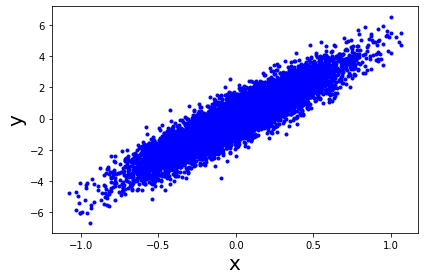

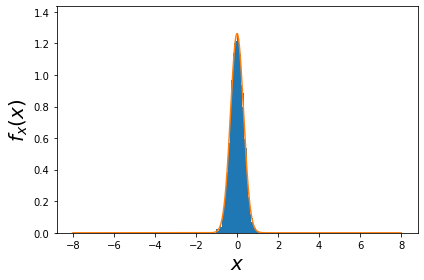

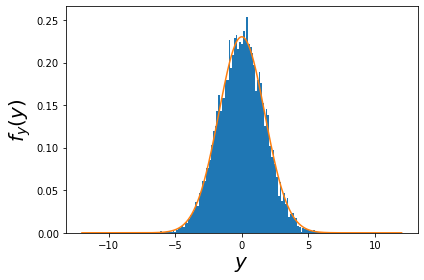

In [5]:
# Parameters controlling the simulation
N_pts = 10000
mu = np.array([0., 0.])
Sigma = np.array([[0.1, 0.5],[0.5, 3.]])
# Generate the mock data
random_pts = np.random.multivariate_normal(mu, Sigma, size = N_pts)

fig, ax = pl.subplots(1,1)
ax.plot(random_pts[:,0],random_pts[:,1], 'b.')
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
fig.tight_layout()
fig.savefig('marginalization_1.png')

fig, ax = pl.subplots(1,1)
ax.hist(random_pts[:,0], density = True, bins = 100)
xx = np.linspace(-8., 8., num = 1000)
fx = (1./np.sqrt(2.*np.pi*Sigma[0,0]))*np.exp(-0.5*(xx**2 / Sigma[0,0]))
ax.plot(xx, fx)
ax.set_xlabel(r'$x$', fontsize = 20 )
ax.set_ylabel(r'$f_x(x)$', fontsize = 20)
fig.tight_layout()
fig.savefig('marginalization_2.png')

fig2, ax2 = pl.subplots(1,1)
ax2.hist(random_pts[:,1], density = True, bins = 100)
yy = np.linspace(-12., 12., num = 1000)
fy = (1./np.sqrt(2.*np.pi*Sigma[1,1]))*np.exp(-0.5*(yy**2 / Sigma[1,1]))
ax2.plot(yy, fy)
ax2.set_xlabel(r'$y$', fontsize = 20 )
ax2.set_ylabel(r'$f_y(y)$', fontsize = 20)
fig2.tight_layout()
fig2.savefig('marginalization_3.png')

## The code below will generate the plots for problem 2.

Ni =  0
F = 0.0, num_outlier = 0
F = 0.01, num_outlier = 1
F = 0.1, num_outlier = 10
Ni =  1
F = 0.0, num_outlier = 0
F = 0.01, num_outlier = 10
F = 0.1, num_outlier = 100
Ni =  2
F = 0.0, num_outlier = 0
F = 0.01, num_outlier = 100
F = 0.1, num_outlier = 1000


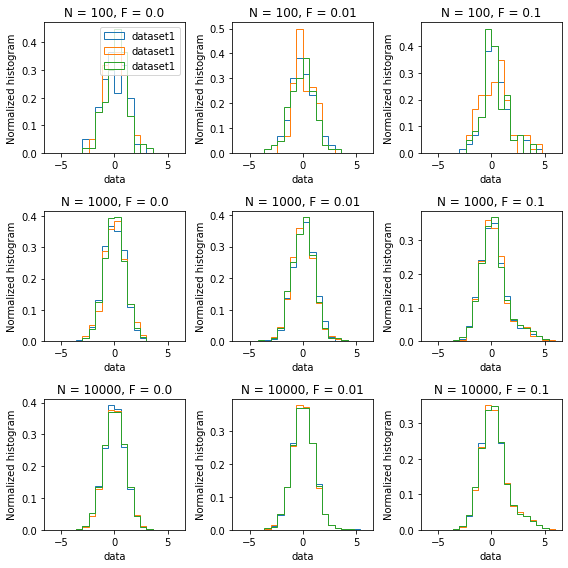

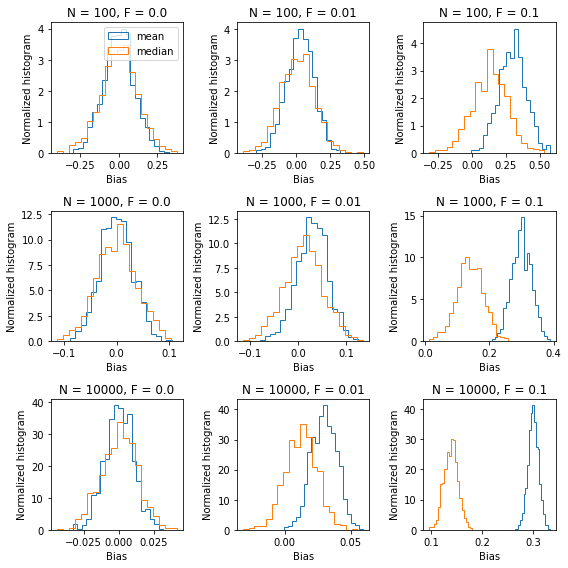

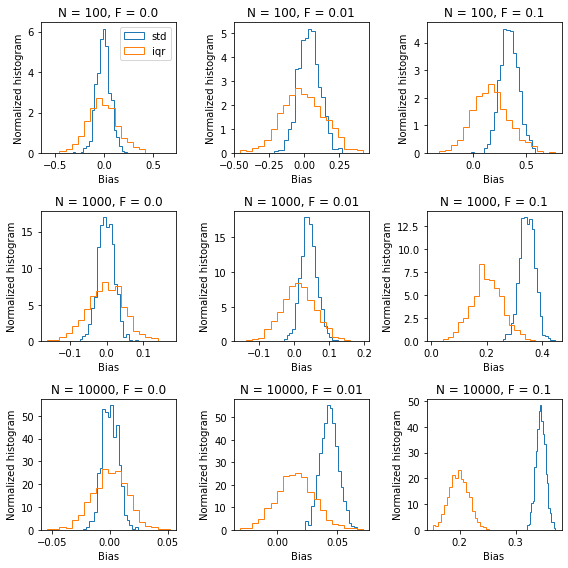

In [6]:
N_datasets = 1000

N_arr = [100,1000,10000]
F_arr = [0., 0.01, 0.1]

# Generate the mock data set
def make_data(N_datasets, N_objects, F):
    num_outlier = int(np.round(N_objects*F))
    print("F = {}, num_outlier = {}".format(F, num_outlier))
    num_normal = int(N_objects - num_outlier)

    #'normal' population
    mu1 = 0.
    sigma1 = 1.
    samp1 = np.random.randn(N_datasets, num_normal)*sigma1 + mu1

    #'outlier' population
    mu2 = 3.
    sigma2 = 1
    samp2 = np.random.randn(N_datasets, num_outlier)*sigma2 + mu2

    samp = np.hstack((samp1, samp2))
    return samp

#Compute the statistics of interest and the corresponding biases
def get_stats(N, F, N_datasets):
    
    data = make_data(N_datasets, N, F)
    
    #True values in the absence of outliers
    mean_true = 0.
    median_true = 0.
    
    std_true = 1.0
    iqr_true = stats.norm.ppf(0.75) - stats.norm.ppf(0.25)
    
    #compute biases etc. for all datasets
    mean_bias_all = np.mean(data,axis=1) - mean_true
    median_bias_all = np.median(data,axis=1) - median_true
    
    std_bias_all = np.std(data,axis=1) - std_true
    iqr_bias_all = iqr(data,axis=1) - iqr_true
    
    return mean_bias_all, median_bias_all, std_bias_all, iqr_bias_all, data


fig_data, ax_data = pl.subplots(len(N_arr),len(F_arr), figsize = (8,8))
fig_stats1, ax_stats1 = pl.subplots(len(N_arr),len(F_arr), figsize = (8,8))
fig_stats2, ax_stats2 = pl.subplots(len(N_arr),len(F_arr), figsize = (8,8))

for Ni in range(0,len(N_arr)):
    print("Ni = ", Ni)
    for Fi in range(0,len(F_arr)):
        mean_bias, median_bias, std_bias, iqr_bias, data = get_stats(N_arr[Ni], F_arr[Fi], N_datasets)
        
        ax_data[Ni,Fi].hist(data[0,:], density = True, bins = 20, histtype = 'step', range = (-6,6), label= 'dataset1')
        ax_data[Ni,Fi].hist(data[1,:], density = True, bins = 20, histtype = 'step', range = (-6,6), label= 'dataset1')
        ax_data[Ni,Fi].hist(data[2,:], density = True, bins = 20, histtype = 'step', range = (-6,6), label= 'dataset1')
        ax_data[Ni,Fi].set_xlabel('data')
        ax_data[Ni,Fi].set_ylabel('Normalized histogram')
        
        ax_stats1[Ni,Fi].hist(mean_bias, density=True, label = 'mean', bins = 20, histtype = 'step')
        ax_stats1[Ni,Fi].hist(median_bias, density=True, label = 'median', bins = 20, histtype = 'step')
        ax_stats1[Ni,Fi].set_xlabel('Bias')
        ax_stats1[Ni,Fi].set_ylabel('Normalized histogram')

        ax_stats2[Ni,Fi].hist(std_bias, density=True, label = 'std', bins = 20, histtype = 'step')
        ax_stats2[Ni,Fi].hist(iqr_bias, density=True, label = 'iqr', bins = 20, histtype = 'step')
        ax_stats2[Ni,Fi].set_xlabel('Bias')
        ax_stats2[Ni,Fi].set_ylabel('Normalized histogram')

        
        ax_data[Ni,Fi].set_title('N = {}, F = {}'.format(N_arr[Ni], F_arr[Fi]))
        ax_stats1[Ni,Fi].set_title('N = {}, F = {}'.format(N_arr[Ni], F_arr[Fi]))
        ax_stats2[Ni,Fi].set_title('N = {}, F = {}'.format(N_arr[Ni], F_arr[Fi]))

ax_data[0,0].legend()
ax_stats1[0,0].legend()
ax_stats2[0,0].legend()

fig_data.tight_layout()
fig_stats1.tight_layout()
fig_stats2.tight_layout()

fig_data.savefig('descriptive_stats_1.png')
fig_stats1.savefig('descriptive_stats_2.png')
fig_stats2.savefig('descriptive_stats_3.png')


## The code below will generate the plots for problem 3

In [14]:
# parameters controlling mock data
N_data = 1000000
mu_f = 1.0
SNR = [5, 10., 20.]

for SNR_i in SNR:
    sigma_f = mu_f/SNR_i
    f = mu_f + np.random.randn(N_data)*sigma_f
    
    m = -2.5*np.log10(f)
    actual_m_error = np.std(m)
    expected_m_error = (2.5/np.log(10.))/SNR_i
    print("SNR = ", SNR_i)
    print("actual error in m = ", actual_m_error)
    print("expected error in m = ", expected_m_error)
    print("fractional error uncertainty progation formula = ", 1.0 - expected_m_error/actual_m_error)

SNR =  5
actual error in m =  0.23025630051546322
expected error in m =  0.21714724095162588
fractional error uncertainty progation formula =  0.05693246844707722
SNR =  10.0
actual error in m =  0.11005234357686752
expected error in m =  0.10857362047581294
fractional error uncertainty progation formula =  0.01343654349370349
SNR =  20.0
actual error in m =  0.05442473356564246
expected error in m =  0.05428681023790647
fractional error uncertainty progation formula =  0.0025342030856180253
